In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
import pyOpam as O

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
O.__version__

'0.0.1dev'

In [2]:
Data = pd.read_excel('NewOpamExperiments.xlsx')
OPAM = Data.copy() # only OPAM saturated experimnts
No_OPAM = Data.copy() # all experiments

A = (Data['Ol'] == 'Yes') & (Data['Plag'] == 'Yes') & (Data['Cpx'] == 'Yes') # select only experiments that have reported Ol, Cpx, and Plag
OPAM = OPAM[A]
OPAM['MnO_Liq'][np.isnan(OPAM['MnO_Liq'])] = 0.0
OPAM['Cr2O3_Liq'][np.isnan(OPAM['Cr2O3_Liq'])] = 0.0
OPAM['P2O5_Liq'][np.isnan(OPAM['P2O5_Liq'])] = 0.0
OPAM = OPAM.reset_index(drop = True)

In [3]:
Elements = ['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 
            'MnO_Liq', 'MgO_Liq', 'CaO_Liq', 'Na2O_Liq', 
            'K2O_Liq', 'P2O5_Liq', 'Cr2O3_Liq','H2O_Liq']

Res_V_OPAM = O.calc_liq_press(liq_comps = OPAM[Elements], equationP = "P_Voigt2017", fo2 = "QFM", fo2_offset = OPAM['FMQ_offset'], T_K = OPAM['T_K'])
Res_V_OPAM_fin = Res_V_OPAM.copy()
Res_V_OPAM_fin =Res_V_OPAM_fin.fillna(0)

V_OPAM_results = pt.calculate_R2(OPAM['P_kbar'], Res_V_OPAM['P_kbar_calc'])
V_OPAM_results_test = pt.calculate_R2(OPAM['P_kbar'][Res_V_OPAM['Pf'] > 0.8], 
                                      Res_V_OPAM['P_kbar_calc'][Res_V_OPAM['Pf'] > 0.8])
V_OPAM_MAE = (1/len(OPAM['SiO2_Liq']))*np.sum(Res_V_OPAM['P_kbar_calc'] - OPAM['P_kbar'])
V_OPAM_MAE_test = (1/len(OPAM['SiO2_Liq'][Res_V_OPAM['Pf'] > 0.8]))*np.sum(Res_V_OPAM['P_kbar_calc'][Res_V_OPAM['Pf'] > 0.8]
                                                                      - OPAM['P_kbar'][Res_V_OPAM['Pf'] > 0.8])

Res_V_all = O.calc_liq_press(liq_comps = Data[Elements], equationP = "P_Voigt2017", fo2 = "QFM", fo2_offset = Data['FMQ_offset'], T_K = Data['T_K'])
Res_V_all_fin = Res_V_all.copy()
Res_V_all_fin =Res_V_all_fin.fillna(0)

V_all_results = pt.calculate_R2(Data['P_kbar'], Res_V_all['P_kbar_calc'])
V_all_results_test = pt.calculate_R2(Data['P_kbar'][Res_V_all['Pf'] > 0.8], 
                                      Res_V_all['P_kbar_calc'][Res_V_all['Pf'] > 0.8])
V_all_MAE = (1/len(Data['SiO2_Liq']))*np.sum(Res_V_all['P_kbar_calc'] - Data['P_kbar'])
V_all_MAE_test = (1/len(Data['SiO2_Liq'][Res_V_all['Pf'] > 0.8]))*np.sum(Res_V_all['P_kbar_calc'][Res_V_all['Pf'] > 0.8]
                                                                      - Data['P_kbar'][Res_V_all['Pf'] > 0.8])

Res_H = O.calc_liq_press(liq_comps = OPAM[Elements], equationP="P_Herzberg2004")
Res_H_fin = Res_H.copy()
Res_H_fin = Res_H_fin.fillna(0)

H_results = pt.calculate_R2(OPAM['P_kbar'], Res_H_fin['P_kbar_calc'])
H_MAE = (1/len(OPAM['SiO2_Liq']))*np.sum(Res_H_fin['P_kbar_calc'] - OPAM['P_kbar'])

Res_H_all = O.calc_liq_press(liq_comps = Data[Elements], equationP="P_Herzberg2004")
Res_H_all_fin = Res_H_all.copy()
Res_H_all_fin = Res_H_all_fin.fillna(0)

H_all_results = pt.calculate_R2(Data['P_kbar'], Res_H_all_fin['P_kbar_calc'])
H_all_MAE = (1/len(Data['SiO2_Liq']))*np.sum(Res_H_all_fin['P_kbar_calc'] - Data['P_kbar'])

Res_Y_all = O.calc_liq_press(liq_comps = Data[Elements], equationP = "P_Yang1996")
Res_Y_all_fin = Res_Y_all.copy()
Res_Y_all_fin =Res_Y_all_fin.fillna(0)

Y_all_results = pt.calculate_R2(No_OPAM['P_kbar'], Res_Y_all['P_kbar_calc'])
Y_all_results_test = pt.calculate_R2(No_OPAM['P_kbar'][Res_Y_all['Pf'] > 0.8], 
                                     Res_Y_all['P_kbar_calc'][Res_Y_all['Pf'] > 0.8])
Y_all_MAE = (1/len(No_OPAM['SiO2_Liq']))*np.sum(Res_Y_all['P_kbar_calc'] - No_OPAM['P_kbar'])
Y_all_MAE_test = (1/len(No_OPAM['SiO2_Liq'][Res_Y_all['Pf'] > 0.8]))*np.sum(Res_Y_all['P_kbar_calc'][Res_Y_all['Pf'] > 0.8]
                                                                      - No_OPAM['P_kbar'][Res_Y_all['Pf'] > 0.8])

Res_Y_OPAM = O.calc_liq_press(liq_comps = OPAM[Elements], equationP = "P_Yang1996")
Res_Y_OPAM_fin = Res_Y_OPAM.copy()
Res_Y_OPAM_fin = Res_Y_OPAM_fin.fillna(0)

Y_OPAM_results = pt.calculate_R2(OPAM['P_kbar'], Res_Y_OPAM['P_kbar_calc'])
Y_OPAM_results_test = pt.calculate_R2(OPAM['P_kbar'][Res_Y_OPAM['Pf'] > 0.8], 
                                      Res_Y_OPAM['P_kbar_calc'][Res_Y_OPAM['Pf'] > 0.8])
Y_OPAM_MAE = (1/len(OPAM['SiO2_Liq']))*np.sum(Res_Y_OPAM['P_kbar_calc'] - OPAM['P_kbar'])
Y_OPAM_MAE_test = (1/len(OPAM['SiO2_Liq'][Res_Y_OPAM['Pf'] > 0.8]))*np.sum(Res_Y_OPAM['P_kbar_calc'][Res_Y_OPAM['Pf'] > 0.8]
                                                                      - OPAM['P_kbar'][Res_Y_OPAM['Pf'] > 0.8])

# Compile all results into a single variable
Results = {}
Results['Y_OPAM'] = {'Results': Res_Y_OPAM_fin, 'Stats': Y_OPAM_results, 'Stats_test': Y_OPAM_results_test,
                    'MAE': Y_OPAM_MAE, 'MAE_test': Y_OPAM_MAE_test, 'P_kbar_true': OPAM['P_kbar']}

Results['V_OPAM'] = {'Results': Res_V_OPAM_fin, 'Stats': V_OPAM_results, 'Stats_test': V_OPAM_results_test,
                    'MAE': V_OPAM_MAE, 'MAE_test': V_OPAM_MAE_test, 'P_kbar_true': OPAM['P_kbar']}

Results['H_OPAM'] = {'Results': Res_H_fin, 'Stats': H_results, 'Stats_test': np.nan,
                    'MAE': H_MAE, 'MAE_test': np.nan, 'P_kbar_true': OPAM['P_kbar']}

Results['Y_all'] = {'Results': Res_Y_all_fin, 'Stats': Y_all_results, 'Stats_test': Y_all_results_test,
                    'MAE': Y_all_MAE, 'MAE_test': Y_all_MAE_test, 'P_kbar_true': Data['P_kbar']}

Results['V_all'] = {'Results': Res_V_all_fin, 'Stats': V_all_results, 'Stats_test': V_all_results_test,
                    'MAE': V_all_MAE, 'MAE_test': V_all_MAE_test, 'P_kbar_true': Data['P_kbar']}

Results['H_all'] = {'Results': Res_H_all_fin, 'Stats': H_all_results, 'Stats_test': np.nan,
                    'MAE': H_all_MAE, 'MAE_test': np.nan, 'P_kbar_true': Data['P_kbar']}


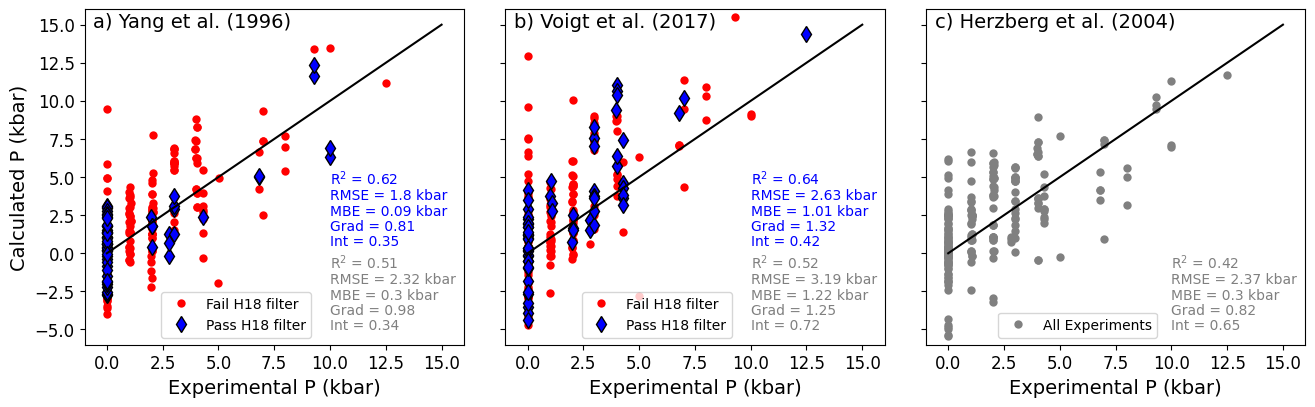

In [51]:
Outputs = np.array(list(Results.keys())).reshape(2,3)
alpha = 1 # alpha of data that doesn't pass the test
color_true = 'blue' # data that passes the test
color_false = 'r' # data that doesn't pass
true_symbol = 'd' # symbol of data that passes the test
true_size = 8 # size of symbols that pass the test

f, a = plt.subplots(1,3, figsize = (13,4), sharex = True, sharey = True)
f.tight_layout()

a[0].set_xlabel('Experimental P (kbar)')
a[1].set_xlabel('Experimental P (kbar)')
a[2].set_xlabel('Experimental P (kbar)')

a[0].set_ylabel('Calculated P (kbar)')

a[0].text(-0.6,14.8,'a) Yang et al. (1996)', fontsize = 14)
a[1].text(-0.6,14.8,'b) Voigt et al. (2017)', fontsize = 14)
a[2].text(-0.6,14.8,'c) Herzberg et al. (2004)', fontsize = 14)

for i in range(3):
    if i != 2:
        a[i].plot(Results[Outputs[0,i]]['P_kbar_true'],Results[Outputs[0,i]]['Results']['P_kbar_calc'], 'o',
                    markerfacecolor = color_false, markeredgecolor = 'none', alpha = alpha, label = 'Fail H18 filter')
        if type(Results[Outputs[0][i]]['Stats_test']) == dict:
            a[i].plot(Results[Outputs[0,i]]['P_kbar_true'][Results[Outputs[0,i]]['Results']['Pf'] > 0.8],
                Results[Outputs[0,i]]['Results']['P_kbar_calc'][Results[Outputs[0,i]]['Results']['Pf'] > 0.8],
                        markerfacecolor = color_true, markeredgecolor = 'k', markersize = true_size, 
                        marker = true_symbol, linestyle = 'none', label = 'Pass H18 filter')
    else:
        a[i].plot(Results[Outputs[0,i]]['P_kbar_true'],Results[Outputs[0,i]]['Results']['P_kbar_calc'], 'o',
                    markerfacecolor = [0.5,0.5,0.5], markeredgecolor = 'none', alpha = alpha, label = 'All Experiments')
    
    a[i].plot([0,15],[0,15], 'k-')

    if type(Results[Outputs[0][i]]['Stats_test']) == dict:
        a[i].text(10, 4.5, 'R$^{2}$ = ' + Results[Outputs[0,i]]['Stats_test']['R2'], color = color_true)
        a[i].text(10, 3.5, 'RMSE = ' + str(round(float(Results[Outputs[0,i]]['Stats_test']['RMSE']),2)) + ' kbar', color = color_true)
        a[i].text(10, 2.5, 'MBE = ' + str(round(Results[Outputs[0,i]]['MAE_test'],2)) + ' kbar', color = color_true)
        a[i].text(10, 1.5, 'Grad = ' + str(round(float(Results[Outputs[0,i]]['Stats_test']['Grad']),2)), color = color_true)
        a[i].text(10, 0.5, 'Int = ' + str(round(float(Results[Outputs[0,i]]['Stats_test']['Int']),2)), color = color_true)

    a[i].text(10, -1, 'R$^{2}$ = ' + Results[Outputs[0,i]]['Stats']['R2'], color = [0.5,0.5,0.5])
    a[i].text(10, -2, 'RMSE = ' + str(round(float(Results[Outputs[0,i]]['Stats']['RMSE']),2)) + ' kbar', color = [0.5,0.5,0.5])
    a[i].text(10, -3, 'MBE = ' + str(round(Results[Outputs[0,i]]['MAE'],2)) + ' kbar', color = [0.5,0.5,0.5])
    a[i].text(10, -4, 'Grad = ' + str(round(float(Results[Outputs[0,i]]['Stats']['Grad']),2)), color = [0.5,0.5,0.5])
    a[i].text(10, -5, 'Int = ' + str(round(float(Results[Outputs[0,i]]['Stats']['Int']),2)), color = [0.5,0.5,0.5])

    a[i].set_xlim([-1, 16])
    a[i].set_ylim([-6, 16])
        
a[0].legend(loc = "lower center", bbox_to_anchor = (0.4,0))
a[1].legend(loc = "lower center", bbox_to_anchor = (0.4,0))
a[2].legend(loc = "lower center", bbox_to_anchor = (0.4,0))
plt.savefig("OPAM_results_new.png", dpi = 300, bbox_inches='tight')

In [19]:
x = Res_Y_OPAM_fin['P_kbar_calc'][Res_Y_OPAM_fin['Pf'] > 0.8]
y = OPAM['P_kbar'][Res_Y_OPAM_fin['Pf'] > 0.8]

Res = pd.DataFrame()
Res['P_kbar_calc'] = x.values
Res['P_kbar_true'] = y.values
Res.to_excel('Test_stats.xlsx')

In [20]:
def RMSE(x,y):
    RMSE = np.sqrt(np.sum((x - y)**2)/len(x))
    return RMSE

def std(x):
    std = np.sqrt(np.sum((x - np.mean(x))**2)/len(x))
    return std

In [21]:
RMSE = RMSE(x.values, y.values)
print(RMSE)

1.7955249910361006


In [22]:
std = std(x.values)
print(std)

2.787991175332064


In [24]:
np.polyfit(x.values, y.values,1)

array([0.75853152, 0.26692776])

In [14]:
pt.calculate_R2(x,y)

{'R2': '0.62',
 'RMSE': '1.80',
 'RMSE_num': 1.79552,
 'P_val': '0.000',
 'Median': '-0.23',
 'Mean': '-0.09',
 'Int': array([0.26692776]),
 'Grad': array([0.75853152]),
 'x_pred': array([[ 0.43026203],
        [ 2.41187094],
        [ 2.92109064],
        [ 1.82181967],
        [ 0.66607534],
        [-0.1467643 ],
        [-0.18789028],
        [ 1.29064644],
        [ 2.35516438],
        [ 0.69297532],
        [ 5.03673453],
        [ 5.08592055],
        [11.63571357],
        [12.34273455],
        [-2.75716411],
        [ 2.99245246],
        [ 1.54260937],
        [ 1.06439868],
        [ 1.34007229],
        [ 0.61282483],
        [ 1.8163997 ],
        [-0.84434743],
        [ 1.42492134],
        [ 0.2270353 ],
        [ 1.80740893],
        [-0.40018055],
        [ 1.09874172],
        [ 0.20920963],
        [ 1.40032431],
        [-1.49468843],
        [ 0.15095091],
        [ 3.09680377],
        [ 0.9805916 ],
        [ 3.06426569],
        [ 0.44108285],
        [ 0.605

In [5]:
## propagate errors
Comp = pd.read_excel('Galapagos.xlsx')
Comp_Err = Comp[Comp.columns[Comp.columns.str.contains("_Err")]].copy()
Comp_Err['Sample_ID_Liq_Err'] = Comp['Sample_ID_Liq'].copy()

In [6]:
Comp_noise = pt.add_noise_sample_1phase(phase_comp = Comp, phase_err = Comp_Err,
                                        phase_err_type = "Perc", duplicates = 1000, err_dist = "normal")
Comp_noise['Sample_ID_Liq'] = np.linspace(0,len(Comp_noise['SiO2_Liq'])-1, len(Comp_noise['SiO2_Liq']))

All negative numbers replaced with zeros. If you wish to keep these, set positive=False


In [7]:
MC_res = O.calc_liq_press(liq_comps = Comp_noise, equationP = "P_Yang1996")
MC_res_V = O.calc_liq_press(liq_comps = Comp_noise, equationP = "P_Voigt2017", fo2 = "QFM")
MC_res_H = O.calc_liq_press(liq_comps = Comp_noise, equationP = "P_Herzberg2004")

In [8]:
All_Res = MC_res.copy()
All_Res['P_kbar_Voigt'] = MC_res_V['P_kbar_calc']
All_Res['Pf_Voigt'] = MC_res_V['Pf']
All_Res['P_kbar_Herzberg'] = MC_res_H['P_kbar_calc']
All_Res = All_Res.rename(columns = {'P_kbar_calc': 'P_kbar_Yang', 'Pf': 'Pf_Yang'})
Output = All_Res[All_Res['Sample_ID_Liq_Num'] == 1.0].copy().reset_index(drop = True)
Output['P_offset_Yang'] = Output['P_kbar_Yang'] - np.nanmean(Output['P_kbar_Yang'][Output['Pf_Yang'] > 0.8])
Output['P_offset_Yang'][Output['Pf_Yang'] <= 0.8] = np.nan
Output['P_offset_Voigt'] = Output['P_kbar_Voigt'] - np.nanmean(Output['P_kbar_Voigt'][Output['Pf_Voigt'] > 0.8])
Output['P_offset_Voigt'][Output['Pf_Voigt'] <= 0.8] = np.nan
Output['P_offset_Herzberg'] = Output['P_kbar_Herzberg'] - np.nanmean(Output['P_kbar_Herzberg'])
Output.to_excel('MCMC_Output.xlsx')

Text(0.5, 0, '$\\Delta$P (kbar)')

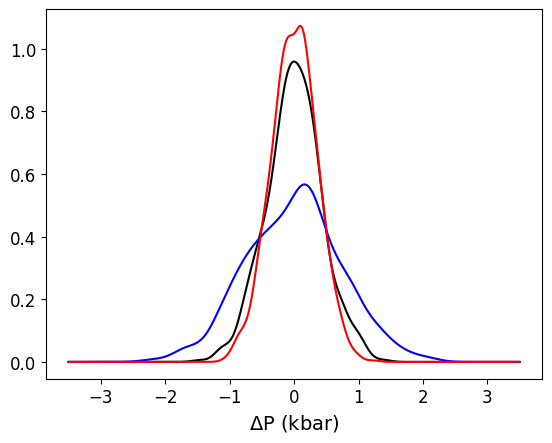

In [12]:
from scipy import stats

Y = stats.gaussian_kde(Output['P_offset_Yang'][Output['Pf_Yang'] > 0.8].values)
V = stats.gaussian_kde(Output['P_offset_Voigt'][Output['Pf_Voigt'] > 0.8].values)
H = stats.gaussian_kde(Output['P_offset_Herzberg'].values)
f, a = plt.subplots(1,1)
a.plot(np.linspace(-3.5, 3.5, 1001), Y(np.linspace(-3.5, 3.5, 1001)), '-k')
a.plot(np.linspace(-3.5, 3.5, 1001), V(np.linspace(-3.5, 3.5, 1001)), '-b')
a.plot(np.linspace(-3.5, 3.5, 1001), H(np.linspace(-3.5, 3.5, 1001)), '-r')

a.set_xlabel('$\Delta$P (kbar)')